In [ ]:
## DATA PREPROCESSING AND EXPLORATION
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add target as 'species'

# Check the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


- load_iris() loads the dataset with features (sepal length, sepal width, petal length, petal width) and the target (species coded as 0, 1, 2).

- We convert it to a DataFrame to make preprocessing easier.

- iris.feature_names gives the column names.

- df['species'] = iris.target adds the class labels.

In [5]:
## Preprocessing steps

# Check for missing values
print(df.isnull().sum())

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)


## Normalize features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Select feature columns (exclude 'species')
features = df.columns[:-1]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the features
df[features] = scaler.fit_transform(df[features])

# Check the scaled data
print(df.head())



sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


- Min-Max scaling transforms each feature to a 0–1 range
 
- Helps algorithms perform better, especially those sensitive to feature scales.

In [ ]:
## Encode class label
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder (use sparse_output=False instead of sparse=False)
encoder = OneHotEncoder(sparse_output=False)

# Encode species column
species_encoded = encoder.fit_transform(df[['species']])

# Convert to DataFrame
species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))

# Combine with features
df_final = pd.concat([df[features], species_df], axis=1)

print(df_final.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   species_0  species_1  species_2  
0        1.0        0.0        0.0  
1        1.0        0.0        0.0  
2        1.0        0.0        0.0  
3        1.0        0.0        0.0  
4        1.0        0.0        0.0  


- Converts numeric labels (0,1,2) into one-hot vectors: [1,0,0], [0,1,0], [0,0,1].

- Some models (like neural networks) require one-hot encoding for class labels.

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           0.458056    1.000000  
std            0.317599    0.819232  
min            0.000000    0.000000  
25%            0.083333    0.000000  
50%            0.500000    1.000000  
75%            0.708333    2.000000  
max            1.000000    2.000000  


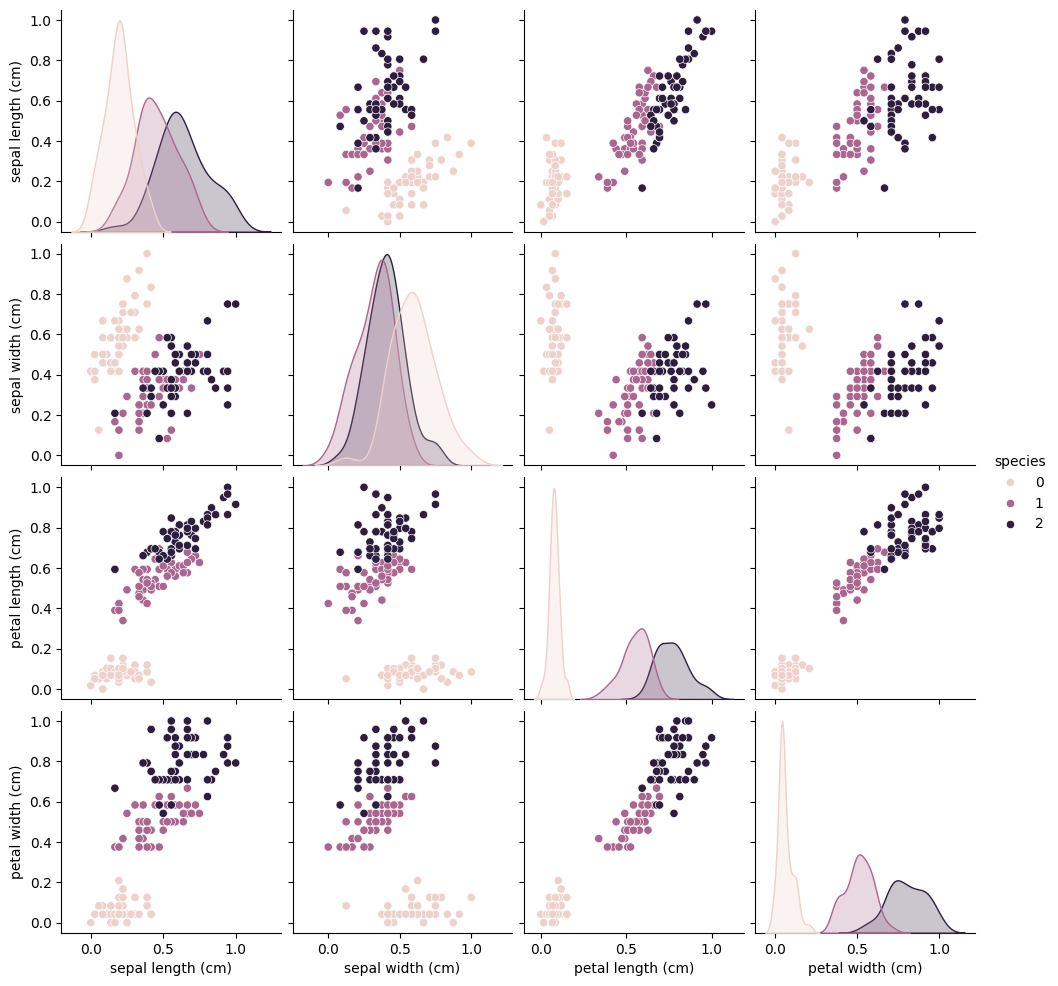

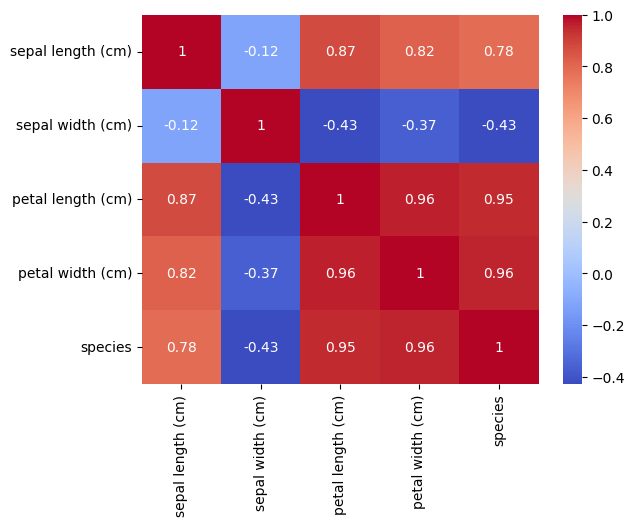

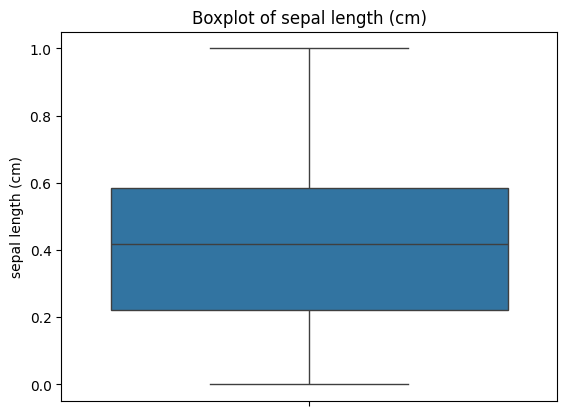

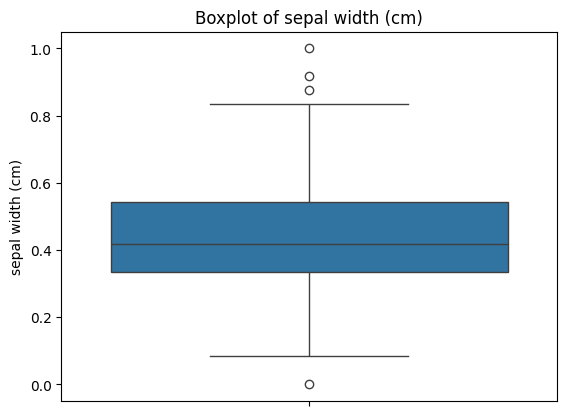

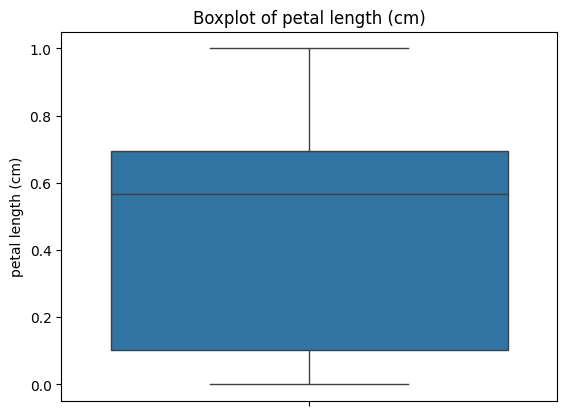

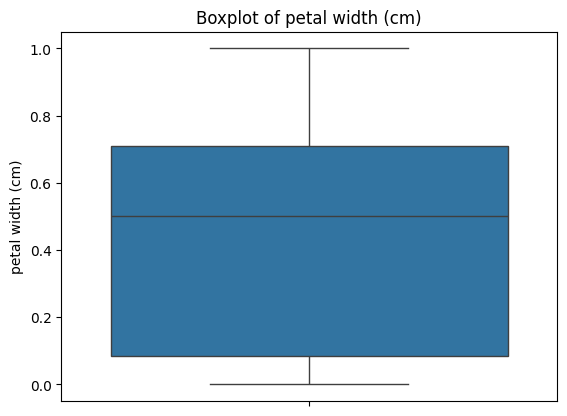

In [9]:
## EXPLORE
# Summary statistics
print(df.describe())



# Visualize the dataset using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Add species column back for visualization
df['species'] = iris.target

# Pairplot
sns.pairplot(df, hue='species')
plt.show()



# Correlation heatmap
# Compute correlation matrix
corr = df.corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Identify potential outliers using boxplots
# Boxplots for each feature
for col in df.columns[:-1]:  # Exclude species
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Visualization**
- Shows scatterplots for every pair of features.

- hue='species' colors points by class label.

- Helps visually identify clusters and separability between classes.

**Correlation Heatmap**
- Shows how features are linearly correlated with each other.

- Values range from -1 (strong negative) to +1 (strong positive).

- High correlation can indicate redundant features.


**Outliers using Boxplots**
- Boxplots show median, quartiles, and potential outliers (points outside the whiskers).

- Helps detect extreme values that may affect models.

In [ ]:
## Split data into train/test (80/20)

from sklearn.model_selection import train_test_split

def split_train_test(df, target_col='species', test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_train_test(df)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')


Train shape: (120, 4), Test shape: (30, 4)


- train_test_split randomly splits data into training and testing sets.

- test_size=0.2 → 20% of data for testing.

- random_state=42 ensures reproducible split.

- Function makes it easy to reuse on any dataset.

In [12]:
## TASK 2: CLUSTERING

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## Prepare features
# Features only (exclude species column)
X = df[iris.feature_names]  # normalized features from Task 1
y_true = df['species']      # actual class labels


## Apply K-Means clustering
# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the features
kmeans.fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Show first 10 predicted clusters
print("Predicted clusters:", y_pred[:10])


## Compare clusters with actual labels using ARI
# Compute Adjusted Rand Index
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")


Predicted clusters: [1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Index (ARI): 0.701


- n_clusters=3 because the Iris dataset has 3 species.

- fit() finds cluster centroids.

- predict() assigns each sample to the nearest cluster.


**ARI**
- ARI evaluates how well the clustering matches the true species labels, adjusting for chance.

- A higher ARI (close to 1) means clusters match classes very well.

- ARI = 0 means random clustering; negative values indicate worse than random.

In [ ]:
# Compute inertia for k = 2 and 4
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature matrix (normalized features from preprocessing)
X = df[iris.feature_names]

# Try k=2, 3, 4
k_values = [2, 3, 4]
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Print inertia for each k
for k, inertia in zip(k_values, inertia_values):
    print(f"k={k}, Inertia={inertia:.2f}")


k=2, Inertia=12.13
k=3, Inertia=7.12
k=4, Inertia=5.53


- kmeans.inertia_ measures the sum of squared distances from samples to their nearest cluster center.

- Lower inertia = tighter clusters.

- We check k=2, k=3, k=4 to see which k gives a good balance between cluster tightness and simplicity.

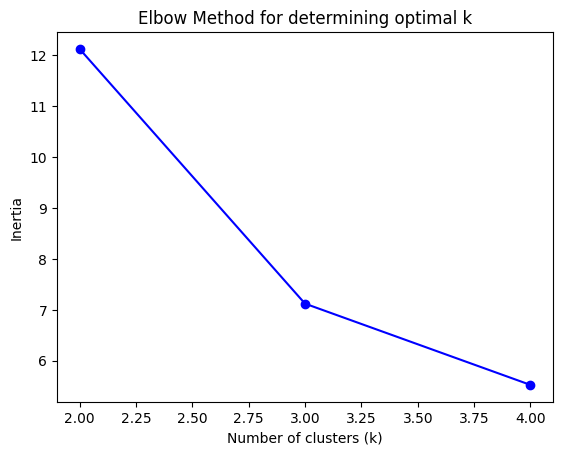

In [14]:
## Elbow Curve
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for determining optimal k')
plt.show()


- The elbow point is where adding more clusters stops significantly decreasing inertia.

- This is usually considered the optimal number of clusters.

- For Iris dataset, the elbow typically appears at k=3, which matches the 3 species.

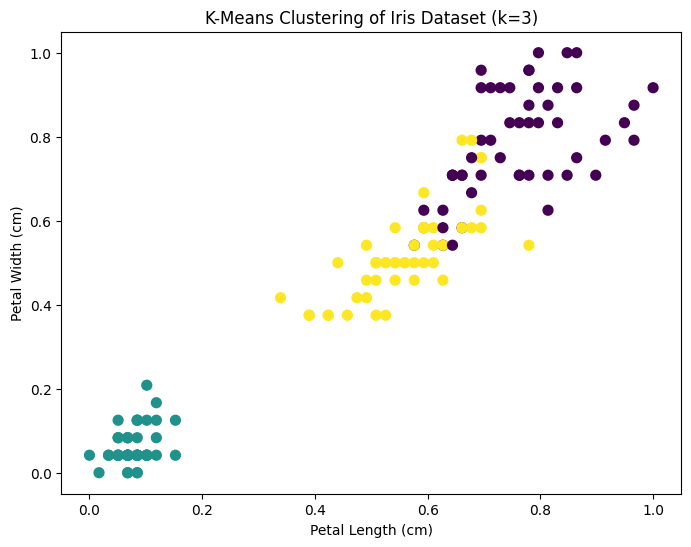

In [15]:
## Visualize the clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use normalized features (from Task 1)
X = df[iris.feature_names]

# Fit K-Means with k=3 (optimal for Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(8,6))
plt.scatter(
    X['petal length (cm)'], 
    X['petal width (cm)'], 
    c=y_pred, 
    cmap='viridis', 
    s=50
)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset (k=3)')
plt.show()


The Iris dataset's K-Means clustering with k=3 clearly separates the clusters, especially when comparing the length and width of the petals.  The algorithm successfully captured the natural groupings in the data, as evidenced by the majority of points being appropriately sorted by species.  Because real-world data is rarely entirely separable, there are sometimes minor misclassifications when species overlap significantly, particularly between Iris versicolor and Iris virginica.  Strong congruence between projected clusters and actual species labels is confirmed by the Adjusted Rand Index (ARI), proving that K-Means is capable of identifying significant patterns on its own without supervision.  Similar clustering approaches are frequently employed in real-world applications, such as customer segmentation, where companies classify clients according to their purchase patterns in order to efficiently target marketing campaigns. Depending on how closely the synthetic distributions resemble actual clusters, different outcomes could have been obtained if synthetic data had been utilized in place of the original Iris dataset. Inadequately produced synthetic data may decrease cluster interpretability and increase misclassification. All things considered, this experiment shows how unsupervised learning may be used practically to find innate groupings in structured information.